<div style="text-align:center;">
  <strong><h1 style="font-size:2em;">Data analysis of job offers extracted from Linkedin by webscraping</h1></strong>
  <strong><h1 style="font-size:2em;">(The dataset was created November 2023)</h1></strong>
</div>

In [6]:
import pandas as pd

In [7]:
# Comprobar codificación del dataset si es necesario
import chardet

# Detect the encoding of the file

filename = 'job_offers_datascience.txt'
with open(filename, 'rb') as f:
    result = chardet.detect(f.read())

print(result)

{'encoding': 'Windows-1254', 'confidence': 0.5511295069051066, 'language': 'Turkish'}


In [8]:
# Loading the dataset

import pandas as pd

filename = '../1_1_Data/job_offers_datascience.txt'

df = pd.read_csv(filename, header=None, sep='\t', names = ['Title','Company', 'Location', 'Description'])
df

,Title,Company,Location,Description
0,"Data Science & Analytics Project, Barcelona Sp...",Robert Walters,"Barcelona, Cataluña, España (Híbrido)",Data & Analytics Freelancer Proj...
1,Data Analyst,Criteo,"Barcelona, Cataluña, España (Híbrido)",What You'll Do:Analytics at Crit...
2,Data Scientist (w/m/d),TRKKN,"Barcelona, Cataluña, España (Híbrido)",Was uns bei TRKKN begeistert ist...
3,Data Scientist,eDreams ODIGEO,"Barcelona, Cataluña, España",eDreams ODIGEO is the world's le...
4,Data Scientist,DESIGUAL,Barcelona y alrededores (Híbrido),Si te consideras una persona ana...
...,...,...,...,...
240,Senior Data Engineer Snowflake y DBT,NTT DATA Europe & Latam,Barcelona y alrededores (Híbrido),NTT DATA Company es una consulto...
241,Azure Data Architect,Coty,"Granollers, Cataluña, España",Data Lake Architect/ Manager CoE...
242,DataOps Engineer,Veeva Systems,España (En remoto),Veeva Systems is a mission-drive...
243,Lead Data Scientist,Clarivate,"Barcelona, Cataluña, España (Híbrido)",#hybrid – BarcelonaWe are lookin...


### Companies that have published more than one job offer

In [9]:
# Companies that have published more than one job offer

df['Company'].value_counts()[df['Company'].value_counts()>1]  # Compañias que han publicado más de 1 oferta

Glovo                                        12
Robert Walters                                8
HP                                            8
SDG Group España                              7
Alexion Pharmaceuticals, Inc.                 6
Zurich Insurance                              5
NTT DATA Europe & Latam                       4
Kiwi.com                                      4
KPMG España                                   4
Siemens Energy                                4
eDreams ODIGEO                                4
Criteo                                        3
Madbox                                        3
Accenture España                              3
Cargill                                       3
Between Technology                            3
Scopely                                       3
Swish Analytics                               3
Sanofi                                        3
Signify Technology                            3
YouGov                                  

### Find similar or identical job offers for a given company

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df_company = df[df['Company'] == 'Glovo']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply the vectorizer to the 'Description' column
tfidf_matrix = vectorizer.fit_transform(df_company['Description'])

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert the similarity matrix to a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, columns=df_company.index, index=df_company.index)

# Display the similarity matrix DataFrame
similarity_df

,32,63,91,143,153,158,172,176,202,232,237,244
32,1.000000,0.858858,0.630013,0.877276,0.880260,0.869981,0.892541,0.755504,0.891429,0.874981,0.910488,0.918540
63,0.858858,1.000000,0.651030,0.891398,0.867691,0.873185,0.871146,0.753766,0.869631,0.859412,0.865528,0.863870
91,0.630013,0.651030,1.000000,0.673923,0.628514,0.633693,0.640935,0.708755,0.675451,0.622826,0.656173,0.655264
143,0.877276,0.891398,0.673923,1.000000,0.878617,0.867767,0.888952,0.748071,0.866233,0.856132,0.879862,0.881832
153,0.880260,0.867691,0.628514,0.878617,1.000000,0.887198,0.889228,0.760062,0.870535,0.860059,0.873351,0.875819
158,0.869981,0.873185,0.633693,0.867767,0.887198,1.000000,0.884780,0.760652,0.877938,0.883610,0.868919,0.871245
172,0.892541,0.871146,0.640935,0.888952,0.889228,0.884780,1.000000,0.836756,0.877372,0.866170,0.890734,0.893218
176,0.755504,0.753766,0.708755,0.748071,0.760062,0.760652,0.836756,1.000000,0.786910,0.760965,0.773668,0.768324
202,0.891429,0.869631,0.675451,0.866233,0.870535,0.877938,0.877372,0.786910,1.000000,0.898305,0.888943,0.891381
232,0.874981,0.859412,0.622826,0.856132,0.860059,0.883610,0.866170,0.760965,0.898305,1.000000,0.883281,0.885008


In [11]:
df.iloc[244]['Description']

"              If you’re here, it’s because you’re looking for an exciting ride. A ride that will fuel your ambitions and make a difference in people’s lives. At Glovo, we believe in paving the way forward together!Not your usual app. We are the fastest-growing multi-category delivery player in Europe, Africa, and Western Asia, where we operate in +3000 cities across 25 countries. Every year, +200k merchants generate over 4B€ in sales and over 20M customers get their goods delivered in minutes.Together we revolutionize the way people connect with their everyday needs, from delivering essentials to connecting our ecosystem of users through innovative solutions powered by technology. For us, every day is filled with purpose.What makes our ride unique?🤝 Our culture and strong values. We have an ‘’office-first’’ culture and we place collaboration at the center of everything we do!We have a non-vanilla personality and feedback mindset. We don’t shy away from difficult conversations - we see

In [12]:
df.iloc[32]['Description']

"              If you’re here, it’s because you’re looking for an exciting ride. A ride that will fuel your ambitions and make a difference in people’s lives. At Glovo, we believe in paving the way forward together!Not your usual app. We are the fastest-growing multi-category delivery player in Europe, Africa, and Western Asia, where we operate in +3000 cities across 25 countries. Every year, +200k merchants generate over 4B€ in sales and over 20M customers get their goods delivered in minutes.Together we revolutionize the way people connect with their everyday needs, from delivering essentials to connecting our ecosystem of users through innovative solutions powered by technology. For us, every day is filled with purpose.What makes our ride unique?🤝 Our culture and strong values. We have an ‘’office-first’’ culture and we place collaboration at the center of everything we do!We have a non-vanilla personality and feedback mindset. We don’t shy away from difficult conversations - we see

### Find common datascience terms in the job ooffers

In [13]:
# List of terms
term_list = ['Excel','Python', 'Pyspark', 'Pandas', 'Matplotlib', 'Spark', 'Ray', 'AWS', 'GCP', 'Google Cloud', 'Azure',
             'Redshift', 'Snowflake', 'Tensorflow', 'Pytorch', 'JAX', 'SQL', 'Git', 'Github', 'Kubeflow', 'Airflow',
             'Flink', 'Kibana', 'Tableau', 'Transformers', 'SpaCy', 'NLTK', 'RAG', 'Looker Studio', 'Power BI', 'Redshift',
             'Snowflake', 'Docker', 'Azkaban', 'Docker', 'Kubernetes']

term_list1 = term_list + [term.lower() for term in term_list]  # include lowercase versions of the terms

term_list_upper = [term.upper() for term in term_list]

# Function to find matching terms in a text (case-insensitive)
def find_matching_terms(text, terms):
    if isinstance(text, str):  # Check if the value is a valid string
        text_lower = text.lower()  # Convert the text to lowercase
        matching_terms = [term.upper() for term in terms if term in text_lower]
        return ', '.join(matching_terms)
    else:
        return ''  # Return an empty string for NaN values

# Create a new column with matching terms
df['Terms'] = df['Description'].apply(lambda x: find_matching_terms(x, term_list1))


df

,Title,Company,Location,Description,Terms
0,"Data Science & Analytics Project, Barcelona Sp...",Robert Walters,"Barcelona, Cataluña, España (Híbrido)",Data & Analytics Freelancer Proj...,"PYTHON, SPARK, AWS, AZURE, SQL"
1,Data Analyst,Criteo,"Barcelona, Cataluña, España (Híbrido)",What You'll Do:Analytics at Crit...,"PYTHON, SQL, GIT, TABLEAU, RAG"
2,Data Scientist (w/m/d),TRKKN,"Barcelona, Cataluña, España (Híbrido)",Was uns bei TRKKN begeistert ist...,"PYTHON, GOOGLE CLOUD, SQL, GIT, RAG"
3,Data Scientist,eDreams ODIGEO,"Barcelona, Cataluña, España",eDreams ODIGEO is the world's le...,"EXCEL, PYTHON, PANDAS, SPARK, TENSORFLOW, SQL,..."
4,Data Scientist,DESIGUAL,Barcelona y alrededores (Híbrido),Si te consideras una persona ana...,"AZURE, SNOWFLAKE, SQL, SNOWFLAKE"
...,...,...,...,...,...
240,Senior Data Engineer Snowflake y DBT,NTT DATA Europe & Latam,Barcelona y alrededores (Híbrido),NTT DATA Company es una consulto...,"PYTHON, AWS, SNOWFLAKE, SQL, GIT, SNOWFLAKE"
241,Azure Data Architect,Coty,"Granollers, Cataluña, España",Data Lake Architect/ Manager CoE...,"EXCEL, PYTHON, SPARK, AWS, GCP, AZURE, REDSHIF..."
242,DataOps Engineer,Veeva Systems,España (En remoto),Veeva Systems is a mission-drive...,"EXCEL, PYTHON, PYSPARK, SPARK, AWS, REDSHIFT, ..."
243,Lead Data Scientist,Clarivate,"Barcelona, Cataluña, España (Híbrido)",#hybrid – BarcelonaWe are lookin...,"EXCEL, PYTHON, AWS"


### Find job offers with no common terms

In [14]:
df[df['Terms'] == '']

,Title,Company,Location,Description,Terms
5,Data Scientist,Worldpanel by Kantar,"Sant Cugat del Vallès, Cataluña, España (Híbrido)","We’re the world’s leading data, ...",
6,Master Data Articles,STADA España,"Barcelona, Cataluña, España (Híbrido)",En STADA perseguimos el propósit...,
25,Data Analyst,Universidad Ricardo Palma,"Barcelona, Cataluña, España (Híbrido)",¿Cuál será tu misión? ✍Te involu...,
35,Data Engineer,Madbox,"Barcelona, Cataluña, España (Híbrido)",Madbox is a mobile gaming compan...,
38,Manager Data & Analytics,SDG Group España,"Barcelona, Cataluña, España (Híbrido)","¡Hola Data Lover! 💙En SDG, no so...",
46,Manager Data,KPMG España,"Barcelona, Cataluña, España (Híbrido)",¿Eres únic@?Entonces eres KPMG O...,
50,Master Data Specialist,Cargill,"Sant Cugat del Vallès, Cataluña, España","Want to build a stronger, more s...",
52,Manager Data STEM Barcelona,KPMG España,"Hospitalet de Llobregat, Cataluña, España","Desde el equipo de LIGHTHOUSE, n...",
55,Marketing Data Analyst,Grupo Planeta,"Hospitalet de Llobregat, Cataluña, España (Pre...",Buscamos un Product Manager para...,
61,Italian Language Data Annotator - Barcelona,TransPerfect,"Barcelona, Cataluña, España (Presencial)",Job descriptionWork Location: Ba...,


In [15]:
df.iloc[25]['Description']

'              ¿Cuál será tu misión? ✍Te involucrarás en aspectos relacionados con análisis técnicos, transformación de datos y cuadros de mandos de todos proyectos en los que participes. ¿Cómo podrás hacerlo? Aprendiendo todo lo posible a nivel técnico y, poco a poco, te haremos ganar confianza en ti mismo e irás contando con la capacidad de gestionar tu propio tiempo y cada vez trabajar con mayor autonomía.Te encargarás también de la redacción de la documentación del proyecto en el que participes.Participarás en el análisis funcional de los proyectos, lo que te permitirá entender el negocio y tener una visión global y mayor conocimiento de los clientes. ¿Qué te hará triunfar en esta posición? 👇 Que estés en último curso o hayas finalizado tus estudios en Ingeniería Informática, Telecomunicaciones, Ciencia de datos, Industriales u otra salida académica que te haya dotado de capacidad de desarrollo y pensamiento crítico en este ambiente.Valoraremos muy positivamente formación adicional

### Most used datascience tools

In [16]:
# Count occurrences of each term in the "MatchingTerms" column
term_counts = {term: df['Terms'].str.count(term).sum() for term in term_list_upper}

# Sort terms by the number of occurrences in descending order
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Display the sorted terms and their counts
for term, count in sorted_terms:
    print(f'{term}: {count}')

SQL: 146
PYTHON: 143
EXCEL: 114
GIT: 102
RAG: 91
AWS: 65
SPARK: 59
AZURE: 43
TABLEAU: 38
SNOWFLAKE: 32
POWER BI: 27
PANDAS: 21
GCP: 20
REDSHIFT: 20
AIRFLOW: 17
DOCKER: 14
PYSPARK: 11
RAY: 11
TENSORFLOW: 10
GOOGLE CLOUD: 9
GITHUB: 8
PYTORCH: 7
KUBERNETES: 5
MATPLOTLIB: 2
KIBANA: 2
FLINK: 1
TRANSFORMERS: 1
JAX: 0
KUBEFLOW: 0
SPACY: 0
NLTK: 0
LOOKER STUDIO: 0
AZKABAN: 0


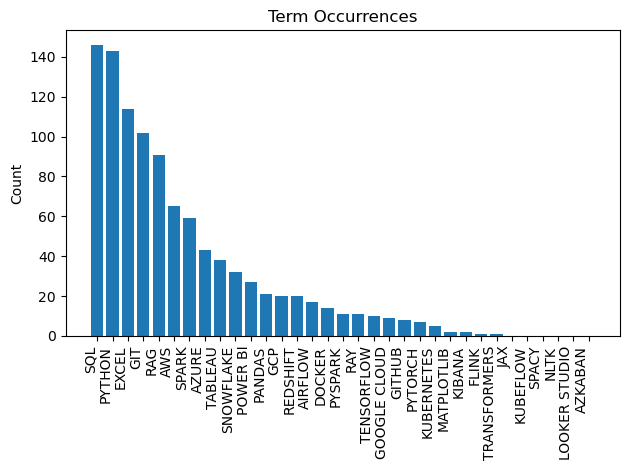

In [17]:
import matplotlib.pyplot as plt

# Count occurrences of each term in the "Terms" column
term_counts = {term: df['Terms'].str.count(term).sum() for term in term_list_upper}
# Sort terms by the number of occurrences in descending order
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Plot a histogram of term occurrences
plt.bar([term[0] for term in sorted_terms], [term[1] for term in sorted_terms])
plt.ylabel('Count')
plt.title('Term Occurrences')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Find how many job offers imply hybrid or remote work

In [18]:
df['Regime'] = df['Location'].str.extract(r'\((.*?)\)')
df

,Title,Company,Location,Description,Terms,Regime
0,"Data Science & Analytics Project, Barcelona Sp...",Robert Walters,"Barcelona, Cataluña, España (Híbrido)",Data & Analytics Freelancer Proj...,"PYTHON, SPARK, AWS, AZURE, SQL",Híbrido
1,Data Analyst,Criteo,"Barcelona, Cataluña, España (Híbrido)",What You'll Do:Analytics at Crit...,"PYTHON, SQL, GIT, TABLEAU, RAG",Híbrido
2,Data Scientist (w/m/d),TRKKN,"Barcelona, Cataluña, España (Híbrido)",Was uns bei TRKKN begeistert ist...,"PYTHON, GOOGLE CLOUD, SQL, GIT, RAG",Híbrido
3,Data Scientist,eDreams ODIGEO,"Barcelona, Cataluña, España",eDreams ODIGEO is the world's le...,"EXCEL, PYTHON, PANDAS, SPARK, TENSORFLOW, SQL,...",NaN
4,Data Scientist,DESIGUAL,Barcelona y alrededores (Híbrido),Si te consideras una persona ana...,"AZURE, SNOWFLAKE, SQL, SNOWFLAKE",Híbrido
...,...,...,...,...,...,...
240,Senior Data Engineer Snowflake y DBT,NTT DATA Europe & Latam,Barcelona y alrededores (Híbrido),NTT DATA Company es una consulto...,"PYTHON, AWS, SNOWFLAKE, SQL, GIT, SNOWFLAKE",Híbrido
241,Azure Data Architect,Coty,"Granollers, Cataluña, España",Data Lake Architect/ Manager CoE...,"EXCEL, PYTHON, SPARK, AWS, GCP, AZURE, REDSHIF...",NaN
242,DataOps Engineer,Veeva Systems,España (En remoto),Veeva Systems is a mission-drive...,"EXCEL, PYTHON, PYSPARK, SPARK, AWS, REDSHIFT, ...",En remoto
243,Lead Data Scientist,Clarivate,"Barcelona, Cataluña, España (Híbrido)",#hybrid – BarcelonaWe are lookin...,"EXCEL, PYTHON, AWS",Híbrido


In [19]:
df['Regime'].value_counts()

Híbrido       140
Presencial     41
En remoto      38
Name: Regime, dtype: int64

In [20]:
N_offers = df['Title'].count()
N_hibrid = df[df['Regime']=='Híbrido']['Regime'].count()
N_remoto = df[df['Regime']=='En remoto']['Regime'].count()

print(round(N_hibrid*100/N_offers), " % híbrido")
print(round(N_remoto*100/N_offers), " % remoto")

57  % híbrido
16  % remoto


### Find years of experience required

In [21]:
import re
# Define a regular expression pattern for the desired text patterns
#pattern = r'(\d+)\s+(años de experiencia|years of experience)'
pattern = r'(\d+)\s*(-?\s*\d*)\s*(años de experiencia|years of experience)'
# Use re.findall to find matches directly
df['Experience'] = df['Description'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

df_filtered = df.dropna(subset=['Experience'])
df_filtered

,Title,Company,Location,Description,Terms,Regime,Experience
14,Data Engineer,Quantion,Barcelona y alrededores (Híbrido),Who we areQuantion is a Business...,"PYTHON, SPARK, AZURE, SQL, GIT, TABLEAU, RAG",Híbrido,"(2, , years of experience)"
16,Data Analyst,Profile Software Services,"Barcelona, Cataluña, España (Híbrido)",¿Buscando nuevos retos?¡Aquí!Des...,"PYTHON, SQL, TABLEAU",Híbrido,"(5, , años de experiencia)"
18,Data Engineer,Red Global,"Barcelona, Cataluña, España",Este anuncio proviene d...,"PYTHON, GCP, AZURE, SQL, RAG, POWER BI",NaN,"(3, , years of experience)"
46,Manager Data,KPMG España,"Barcelona, Cataluña, España (Híbrido)",¿Eres únic@?Entonces eres KPMG O...,,Híbrido,"(5, -8, años de experiencia)"
48,BI Data Analyst,eDreams ODIGEO,"Barcelona, Cataluña, España (Híbrido)",eDreams ODIGEO is one of the wor...,"EXCEL, PYTHON, GOOGLE CLOUD, SQL, GIT, RAG",Híbrido,"(3, , years of experience)"
51,Data Engineer (Power BI),Q-tech,Barcelona y alrededores (Híbrido),Desde Q-Tech nos encontramos en ...,"SQL, TABLEAU, POWER BI",Híbrido,"(2, -3, años de experiencia)"
52,Manager Data STEM Barcelona,KPMG España,"Hospitalet de Llobregat, Cataluña, España","Desde el equipo de LIGHTHOUSE, n...",,NaN,"(5, -10, años de experiencia)"
65,Data Engineer,MindPal,"Barcelona, Cataluña, España (Presencial)",We are looking for Data Engineer...,"EXCEL, PYTHON, SPARK, AWS, SQL",Presencial,"(2, , years of experience)"
71,Data Scientist (m/f/d),Linde,"Barcelona, Cataluña, España (Presencial)",Linde Gas EspañaData Scientist (...,"EXCEL, PYTHON, SQL, TABLEAU, POWER BI",Presencial,"(3, , years of experience)"
74,Experienced Data Scientist Madrid/Barcelona,Accenture España,"Barcelona, Cataluña, España (En remoto)",Accenture is a leading global pr...,"PYTHON, PYSPARK, SPARK, GCP, AZURE, GIT",En remoto,"(2, , years of experience)"


In [22]:
df.iloc[52]['Description']

'              Desde el equipo de LIGHTHOUSE, nuestra área de Data & Analytics, ayudamos a nuestros clientes a encontrar la eficiencia y el alto rendimiento en todas sus funciones TIC, tanto internas como externas hacia sus unidades de negocio y proveedores: buscando la máxima eficiencia en la operación de sus servicios y ajustando sus costes; así como incrementando su trascendencia en la cuenta de resultados y facilitando la innovación.Actualmente, nos encontramos en proceso de crecimiento y estamos buscando un/a Manager Data Scientist para incorporarse al equipo.¿Qué podrás hacer?  Gestionar la preparación, entrega, informes, lanzamiento, monitorización y evaluación de proyectos y compromisos asignados, asumiendo la responsabilidad de los proyectos D&A y compromisos de mayor riesgo.  Supervisar el desarrollo de la Estrategia D&A: Definición de objetivos y áreas de valor, casos de uso, arquitecturas y tecnologías, mapas de información interna / externa y roadmapsde adopción de Big Dat

### Find salary

In [23]:
import re
# Define a regular expression pattern for the desired text patterns
pattern = r'(\d[\d,\.]*)\s*(EUR|€|eur|euros)' 

# Use re.findall to find matches directly
df['Salary'] = df['Description'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

df_filtered = df.dropna(subset=['Salary'])
df_filtered

,Title,Company,Location,Description,Terms,Regime,Experience,Salary
39,Data Engineer,Akuaro,"Barcelona, Cataluña, España (Híbrido)",Here we go!!Join a thriving and ...,"EXCEL, PYTHON, AWS, GCP, AZURE",Híbrido,None,"(45,000, €)"
101,Intern Support Project Management & Data Steward,Schneider Electric,"Barcelona, Cataluña, España (En remoto)",¿Quieres vivir la experiencia de...,"EXCEL, GIT",En remoto,None,"(900, €)"
133,Junior Big Data Engineer (Tech Support) - Goog...,Webhelp,"Barcelona, Cataluña, España (Híbrido)",WHAT WE LOOK FORAre you looking ...,"PYTHON, SPARK, GOOGLE CLOUD, AZURE, SQL, AIRFL...",Híbrido,None,"(30.040, €)"
166,Data Architect,Oxigent Technologies,"Cornellà de Llobregat, Cataluña, España (Híbrido)",¿Te interesaría seguir desarroll...,"PYTHON, SPARK, SQL",Híbrido,None,"(45.000, eur)"


### Find other relevant terms and extract the phrase they appear in

In [24]:
# Define a regular expression pattern for the desired text patterns
pattern = r'(salario|salary|remuneración)' 

# Use re.findall to find matches directly
df['Salary2'] = df['Description'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

df_filtered1 = df.dropna(subset=['Salary2'])
df_filtered1

,Title,Company,Location,Description,Terms,Regime,Experience,Salary,Salary2
4,Data Scientist,DESIGUAL,Barcelona y alrededores (Híbrido),Si te consideras una persona ana...,"AZURE, SNOWFLAKE, SQL, SNOWFLAKE",Híbrido,None,None,salario
8,Data Analyst,Carl Friedrik,"Barcelona, Cataluña, España (Híbrido)",SummaryCarl Friedrik is a travel...,"EXCEL, SQL, TABLEAU, RAG",Híbrido,None,None,salary
11,BIO Data Scientist (Remoto),Between Technology,"Sant Cugat del Vallès, Cataluña, España (En re...",En BETWEEN apostamos por el mejo...,PYTHON,En remoto,None,None,salario
14,Data Engineer,Quantion,Barcelona y alrededores (Híbrido),Who we areQuantion is a Business...,"PYTHON, SPARK, AZURE, SQL, GIT, TABLEAU, RAG",Híbrido,"(2, , years of experience)",None,salary
16,Data Analyst,Profile Software Services,"Barcelona, Cataluña, España (Híbrido)",¿Buscando nuevos retos?¡Aquí!Des...,"PYTHON, SQL, TABLEAU",Híbrido,"(5, , años de experiencia)",None,salario
19,Data Analyst - Thingworx,Between Technology,"Barcelona, Cataluña, España (Presencial)",¿Te interesa trabajar en I+D den...,"PYTHON, SQL, GIT",Presencial,None,None,salario
25,Data Analyst,Universidad Ricardo Palma,"Barcelona, Cataluña, España (Híbrido)",¿Cuál será tu misión? ✍Te involu...,,Híbrido,None,None,salario
29,Data and Predictive Analytics Specialist - EMEA,Cargill,"Sant Cugat del Vallès, Cataluña, España (Híbrido)","Want to build a stronger, more s...",PYTHON,Híbrido,None,None,salary
31,Data Science Manufacturing Consultant,Accenture España,"Barcelona, Cataluña, España",Accenture is a global profession...,"EXCEL, PYTHON, PYSPARK, SPARK, SQL, GIT, KIBAN...",NaN,None,None,salary
38,Manager Data & Analytics,SDG Group España,"Barcelona, Cataluña, España (Híbrido)","¡Hola Data Lover! 💙En SDG, no so...",,Híbrido,None,None,salario


In [25]:
df.iloc[4]['Description']

'              Si te consideras una persona analítica, autónoma y proactiva, con gran capacidad de comunicación y con un inglés fluido, tenemos una oportunidad para ti en nuestras oficinas de Barcelona.Como Data Scientist, contribuirás en la gestión de proyectos de Machine Learning en entorno Cloud, en contacto con stakeholders para desarrollar modelados estadísticos y predictivos.¿Qué te ofrecemos? 4-day work-week: trabajamos 34 horas dentro de una semana laboral de 4 días para potenciar la creatividad y la conciliación. Además, contamos con flexibilidad horaria de entrada y salida.Oficinas abiertas al mar: estamos en la Barceloneta frente al Mar Mediterráneo. Las vistas nos inspiran y el entorno nos permite disfrutar de una vida saludable: hacer deporte, llegar en bicicleta o caminando o comer al aire libre.Podrás flexibilizar tu salario destinándolo a servicios como seguro de salud, transporte, guardería y comida. Además podrás disfrutar de café, infusiones y fruta fresca cada día.D

In [26]:
def find_sentence_around_word(description, target_word):
    pattern = re.compile(r'([^.]*\b' + re.escape(target_word) + r'\b[^.]*)', re.IGNORECASE)
    match = pattern.search(description)
    return match.group(1) if match else None

target_word = 'chemistry'

# Create a new column 'Sentence_around_target'
df[f'Sentence_around_{target_word}'] = df['Description'].apply(lambda x: find_sentence_around_word(x, target_word))

df_filtered = df.dropna(subset=[f'Sentence_around_{target_word}'])
df_filtered

,Title,Company,Location,Description,Terms,Regime,Experience,Salary,Salary2,Sentence_around_chemistry
54,Lead Data Scientist,Clarivate,"Barcelona, Cataluña, España (Híbrido)",#hybrid – BarcelonaWe are lookin...,"EXCEL, PYTHON, AWS",Híbrido,None,None,None,"Experience with search engines, classificatio..."
187,DATA SCIENTIST APPLIED ARTIFICIAL INTELLIGENCE,Eurecat - Centro Tecnológico de Catalunya,"Barcelona, Cataluña, España (Híbrido)",We are looking for a data scient...,"PYTHON, PANDAS, MATPLOTLIB, TENSORFLOW, PYTORC...",Híbrido,None,None,None,Requirements:TRAINING: Bachelor in Computer E...
243,Lead Data Scientist,Clarivate,"Barcelona, Cataluña, España (Híbrido)",#hybrid – BarcelonaWe are lookin...,"EXCEL, PYTHON, AWS",Híbrido,None,None,None,"Experience with search engines, classificatio..."


In [27]:
df_filtered.iloc[2]['Sentence_around_chemistry']

' Experience with search engines, classification algorithms, recommendation systems, and relevance evaluation methodologies Domain knowledge of research areas like chemistry, patent, life science is plus'

In [28]:
df_filtered.iloc[2]['Description']

'              #hybrid – BarcelonaWe are looking for a Lead Data Scientist to join our Data Science & Search team at Clarivate. The team is a central technology group focused on creating cutting-edge algorithmic services and search platforms.Using technologies like Machine Learning, NLP, and Information Retrieval, our scientists, and engineers tackle challenges across the entire Innovation Lifecycle, focusing on enhancing the capabilities of our products and empower our customers to lead innovation on a global scale.About You – experience, education, skills, and accomplishments   Advanced degree in Computer Science, Statistics, Engineering, Physics, Mathematics, or other quantitative majors, or equivalent work experience. 10 or 11 years of industry experience with 5 years of proven track record in the application of ML and NLP. Excellent programming skills (Python, Java, R or C++) Good communication & presentation skills: connecting people, gathering data & information across business 